<a href="https://colab.research.google.com/github/monindew/hongongmachine/blob/main/4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]]
fish_target = fish["Species"].to_numpy()
fish_target
fish_input

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss= "log_loss", max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [13]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.85


In [15]:
import numpy as np
sc = SGDClassifier(loss="log_loss", random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [17]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

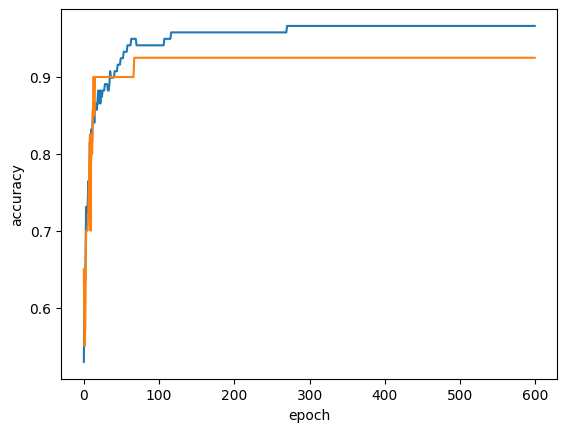

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [21]:
sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [22]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
